# Programming for Data Science Series (Lab Session 12)
## Working with Pandas DataFrame
### Objectives
* Learn how to wrangle data using Pandas
 * Dropping NULL values in our dataset
 * Dropping NULL columns in our dataset
 * Dropping duplicate rows in our dataset
* Data Imputation
 * Filling missing values with average value
* Conditional Selection
* Applying function to a column inside dataframe


### Associated Tutorial for this Lab session is shown below:

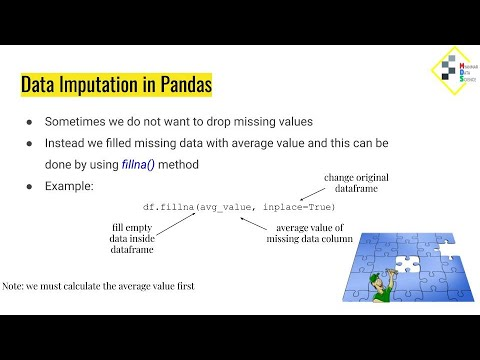

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('y84IwHLxgGk', width=800, height=450)

In [2]:
import pandas as pd
df = pd.read_csv('Covid19.csv')
df.shape

(1719, 8)

In [3]:
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [4]:
df.isnull().sum()

Sno                 0
Date                0
Province/State    462
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

<b>Note: dropna() will remove null value row and return new dataframe without changing the exsiting</b>

In [5]:
cdf = df.dropna()

In [6]:
cdf.shape

(1257, 8)

In [7]:
df.shape

(1719, 8)

<b>Imporant: </b>In some case, we do not want to compromise our rows, in fact, we do not mind to drop column(s) with null values<br/>
We can use axis=1 to drop column(s) that have null value(s). Also note that inplace=True will alter the dataframe.

In [8]:
df.dropna(axis=1, inplace=True)
df.shape

(1719, 7)

In [9]:
df.head()

,Sno,Date,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,China,01/22/2020 12:00:00,0.0,0.0,0.0


### Removing Duplicates

In [10]:
data = {
'Product' : ['Milk', 'Coffee', 'Milk'],
'Price' : [500, 300, 500]
}
ddf = pd.DataFrame(data)
ddf

,Product,Price
0,Milk,500
1,Coffee,300
2,Milk,500


In [11]:
cddf = ddf.drop_duplicates()
cddf

,Product,Price
0,Milk,500
1,Coffee,300


### Imputation
* Sometimes we do not want to drop missing values
* Instead we filled missing data with average value and this can be done by using fillna() method


In [12]:
data = {
'Product' : ['Milk', 'Coffee', 'Tea', 'Milo'],
'Price' : [500, None, 350, 550]
}

tdf = pd.DataFrame(data)
df_price = tdf['Price']
df_price.describe()

count      3.000000
mean     466.666667
std      104.083300
min      350.000000
25%      425.000000
50%      500.000000
75%      525.000000
max      550.000000
Name: Price, dtype: float64

In [13]:
avg_price = df_price.mean()
df_price.fillna(avg_price, inplace=True)
tdf

,Product,Price
0,Milk,500.000000
1,Coffee,466.666667
2,Tea,350.000000
3,Milo,550.000000


### Selection particular columns

In [14]:
cv19df = df
cv19df.head()

,Sno,Date,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,China,01/22/2020 12:00:00,0.0,0.0,0.0


<b>Note: Below code return column as serie, use double brackets to get as a dataframe</b>

In [15]:
conf = cv19df['Confirmed']
conf.head()

0     1.0
1    14.0
2     6.0
3     1.0
4     0.0
Name: Confirmed, dtype: float64

In [21]:
conf = cv19df[['Confirmed']]
conf.head()

,Confirmed
0,1.0
1,14.0
2,6.0
3,1.0
4,0.0


In [16]:
conf.mean()

454.59685863874347

In [17]:
cv19df.describe()

,Sno,Confirmed,Deaths,Recovered
count,1719.000000,1719.000000,1719.000000,1719.000000
mean,860.000000,454.596859,10.441536,44.361838
std,496.376873,3712.529032,106.638286,351.078713
min,1.000000,0.000000,0.000000,0.000000
25%,430.500000,2.000000,0.000000,0.000000
50%,860.000000,12.000000,0.000000,0.000000
75%,1289.500000,109.000000,0.000000,7.000000
max,1719.000000,59989.000000,1789.000000,7862.000000


In [18]:
conf.describe()

count     1719.000000
mean       454.596859
std       3712.529032
min          0.000000
25%          2.000000
50%         12.000000
75%        109.000000
max      59989.000000
Name: Confirmed, dtype: float64

In [19]:
cv19df['Deaths'].describe()

count    1719.000000
mean       10.441536
std       106.638286
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1789.000000
Name: Deaths, dtype: float64

### Selecting rows
For rows, we have two options:
* .loc - locates by name
* .iloc- locates by numerical index
* value_counts() - get number of frequency a particular value appear in a column

In [29]:
country = df['Country'].value_counts()
country

Mainland China          801
US                      188
Australia                84
Canada                   59
China                    34
Thailand                 27
South Korea              27
Japan                    27
Hong Kong                26
Macau                    26
Singapore                26
Vietnam                  26
Taiwan                   26
Malaysia                 25
France                   25
Nepal                    24
Cambodia                 22
Sri Lanka                22
Germany                  22
United Arab Emirates     20
Philippines              20
Finland                  20
India                    19
Italy                    19
UK                       18
Spain                    18
Russia                   18
Sweden                   18
Belgium                  14
Others                   11
Egypt                     4
Brazil                    1
Mexico                    1
Ivory Coast               1
Name: Country, dtype: int64

In [30]:
country.loc['UK']

18

In [31]:
print(country.iloc[0])
print(country.iloc[1])

801
188


### Conditional Selection
* Allow to check whether condition is True or False
* Possible to select data based on conditions
* Possible to use multiple conditions with Boolean operators

In [37]:
condition = (df['Country'] == "China")
condition

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
1689    False
1690    False
1691    False
1692    False
1693    False
1694    False
1695    False
1696    False
1697    False
1698    False
1699    False
1700    False
1701    False
1702    False
1703    False
1704    False
1705    False
1706    False
1707    False
1708    False
1709    False
1710    False
1711    False
1712    False
1713    False
1714    False
1715    False
1716    False
1717    False
1718    False
Name: Country, Length: 1719, dtype: bool

In [39]:
aus_df = df[df['Country'] == "Australia"]
aus_df

,Sno,Date,Country,Last Update,Confirmed,Deaths,Recovered
80,81,01/23/2020 12:00:00,Australia,01/23/2020 12:00:00,0.0,0.0,0.0
165,166,01/25/2020 22:00:00,Australia,01/25/2020 12:00:00,4.0,0.0,0.0
211,212,01/26/2020 23:00:00,Australia,01/26/2020 23:00:00,4.0,0.0,0.0
264,265,01/27/2020 20:30:00,Australia,01/27/2020 20:30:00,4.0,0.0,0.0
265,266,01/27/2020 20:30:00,Australia,01/27/2020 20:30:00,1.0,0.0,0.0
316,317,01/28/2020 23:00:00,Australia,01/28/2020 23:00:00,4.0,0.0,0.0
317,318,01/28/2020 23:00:00,Australia,01/28/2020 23:00:00,1.0,0.0,0.0
369,370,01/29/2020 21:00:00,Australia,01/29/2020 21:00:00,4.0,0.0,0.0
370,371,01/29/2020 21:00:00,Australia,01/29/2020 21:00:00,2.0,0.0,0.0
371,372,01/29/2020 21:00:00,Australia,01/29/2020 21:00:00,1.0,0.0,0.0


### Applying Function
* We can write custom function to perform some task on our dataframe
* If we have repetitive task, we can use apply() method and pass the function name as parameters to a specific column

In [41]:
def situation_function(x):
    if x >= 20:
        return "bad"
    else:
        return "normal"

df["Severity"] = df["Confirmed"].apply(situation_function)

df.head(20)

,Sno,Date,Country,Last Update,Confirmed,Deaths,Recovered,Severity
0,1,01/22/2020 12:00:00,China,01/22/2020 12:00:00,1.0,0.0,0.0,normal
1,2,01/22/2020 12:00:00,China,01/22/2020 12:00:00,14.0,0.0,0.0,normal
2,3,01/22/2020 12:00:00,China,01/22/2020 12:00:00,6.0,0.0,0.0,normal
3,4,01/22/2020 12:00:00,China,01/22/2020 12:00:00,1.0,0.0,0.0,normal
4,5,01/22/2020 12:00:00,China,01/22/2020 12:00:00,0.0,0.0,0.0,normal
5,6,01/22/2020 12:00:00,China,01/22/2020 12:00:00,26.0,0.0,0.0,bad
6,7,01/22/2020 12:00:00,China,01/22/2020 12:00:00,2.0,0.0,0.0,normal
7,8,01/22/2020 12:00:00,China,01/22/2020 12:00:00,1.0,0.0,0.0,normal
8,9,01/22/2020 12:00:00,China,01/22/2020 12:00:00,4.0,0.0,0.0,normal
9,10,01/22/2020 12:00:00,China,01/22/2020 12:00:00,1.0,0.0,0.0,normal
